In [1]:
%load_ext autoreload
%autoreload 2

# To-do list:
- Check what's wrong with savers
- Simplify the passing of inputs of montecarlo_game() functions

In [2]:
import kala

import networkx as nx
import pandas as pd
import numpy as np

from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from helper_functions import helper_diagonal_sbm
from main_functions import montecarlo_game_sbm, montecarlo_game_network

## How does the wealth of a group evolve with respect to the network structure?

### We first start by setting up the constant parameters

In [4]:
## These are the constants not refering to the interactions

num_players = 50
num_steps = 200
num_simulations = 100

In [8]:
## These are the constants refering to the interactions

# How much more do savers win when interacting with another
differential_efficient = 0.3
# How much do savers lose when interacting with a non-saver
differential_inefficient = 0.5

# Standard deviation of log normal distribution
def standard_deviation(eta):
    return eta**2

# Network

# SBM
threshold = [0.5, 0.5]
g, pos = helper_diagonal_sbm(num_players, p_off=0.1)




### Comparison of memory rules

### Memory Rule:
- Average Memory Rule
- All Past Memory Rule
- Any Past Memory Rule
- Fraction Memory Rule. Arguments: fraction=0.4
- Weighted Memory Rule. Arguments: list of weights

100%|██████████| 100/100 [00:40<00:00,  2.48it/s]


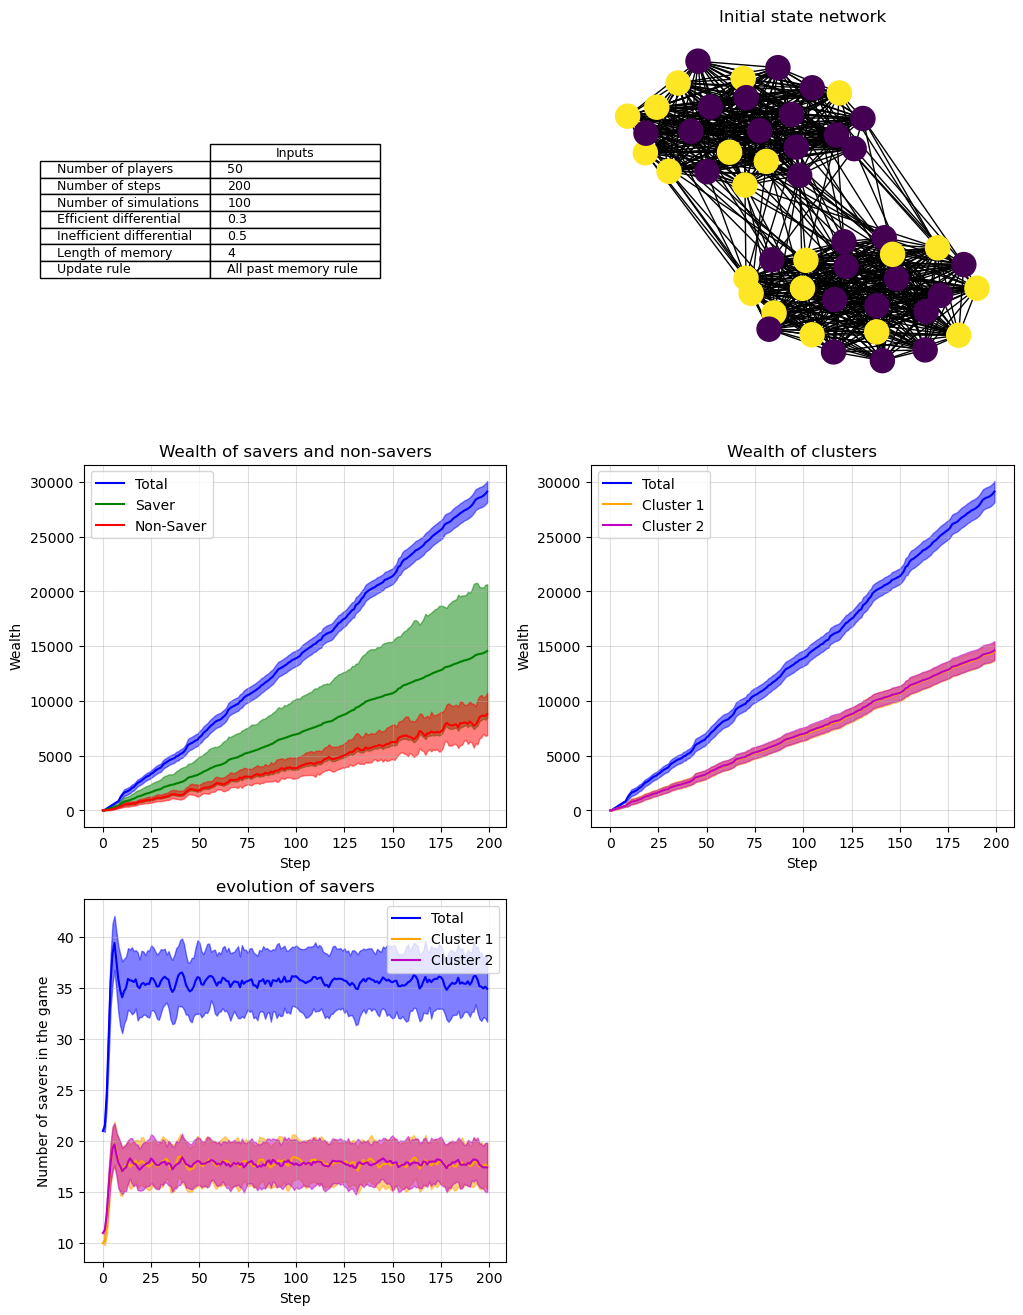

In [10]:
# Number of games that players save in their memory
memory_length = 4
# Memory rule
update_rule = kala.models.memory_rules.AllPastMemoryRule()

# If SBM
montecarlo_game_sbm(
# If another network, comment above and uncomment below
#montecarlo_game_network(g
    num_steps,
    num_simulations,
    num_players,
    threshold,
    differential_efficient,
    differential_inefficient,
    standard_deviation,
    memory_length,
    update_rule
    )

100%|██████████| 100/100 [00:42<00:00,  2.38it/s]


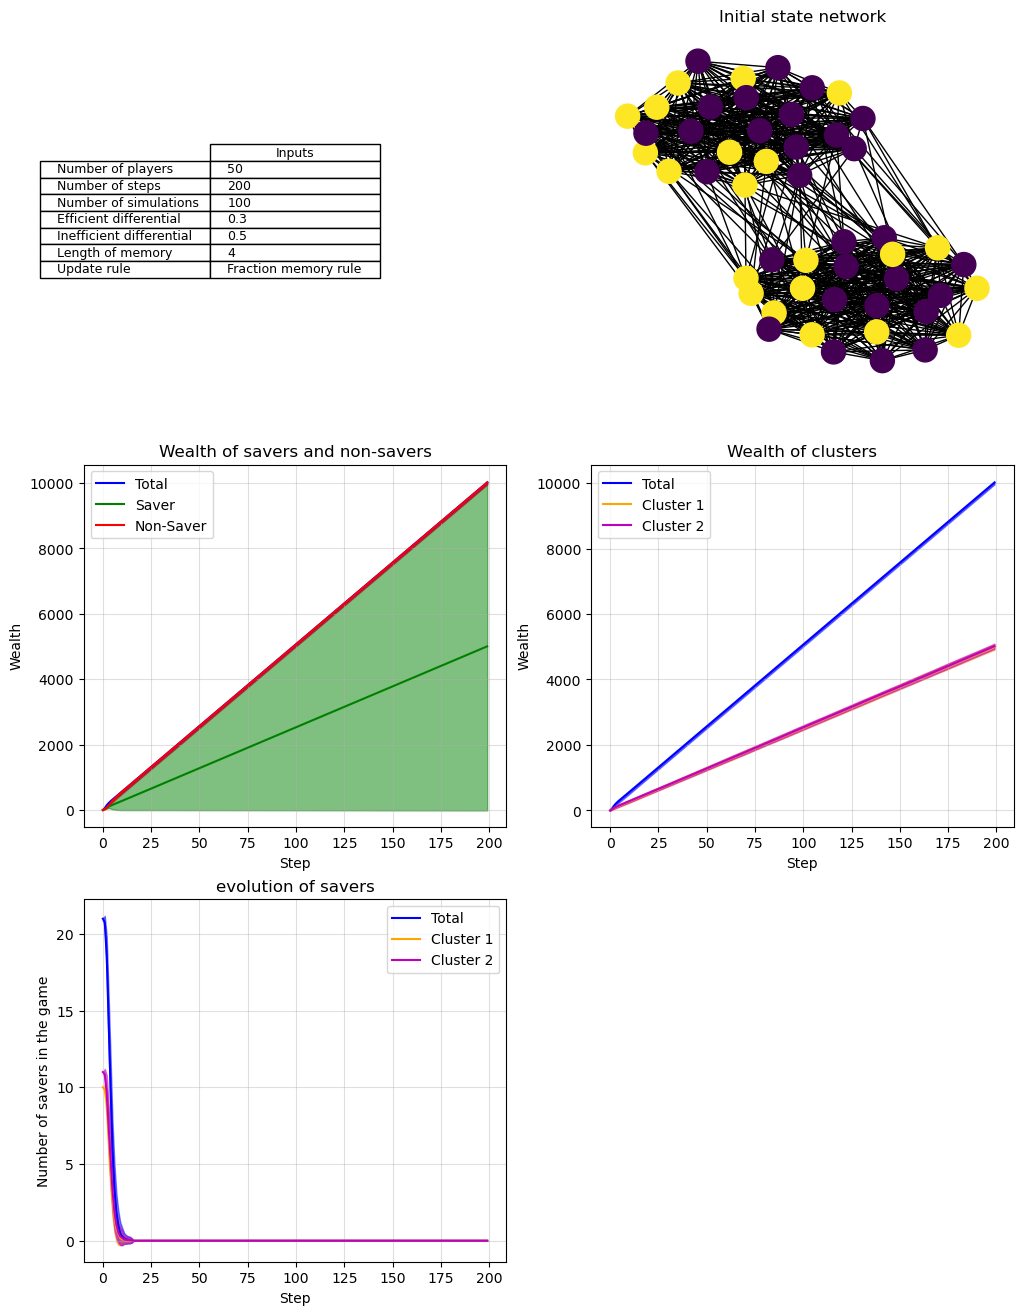

In [ ]:
# Number of games that players save in their memory
memory_length = 4
# Memory rule
fraction = 0.7
update_rule = kala.models.memory_rules.FractionMemoryRule(fraction=fraction)

# If SBM
montecarlo_game_sbm(
# If another network, comment above and uncomment below
#montecarlo_game_network(g
    num_steps,
    num_simulations,
    num_players,
    threshold,
    differential_efficient,
    differential_inefficient,
    standard_deviation,
    memory_length,
    update_rule
    )

100%|██████████| 100/100 [00:48<00:00,  2.05it/s]


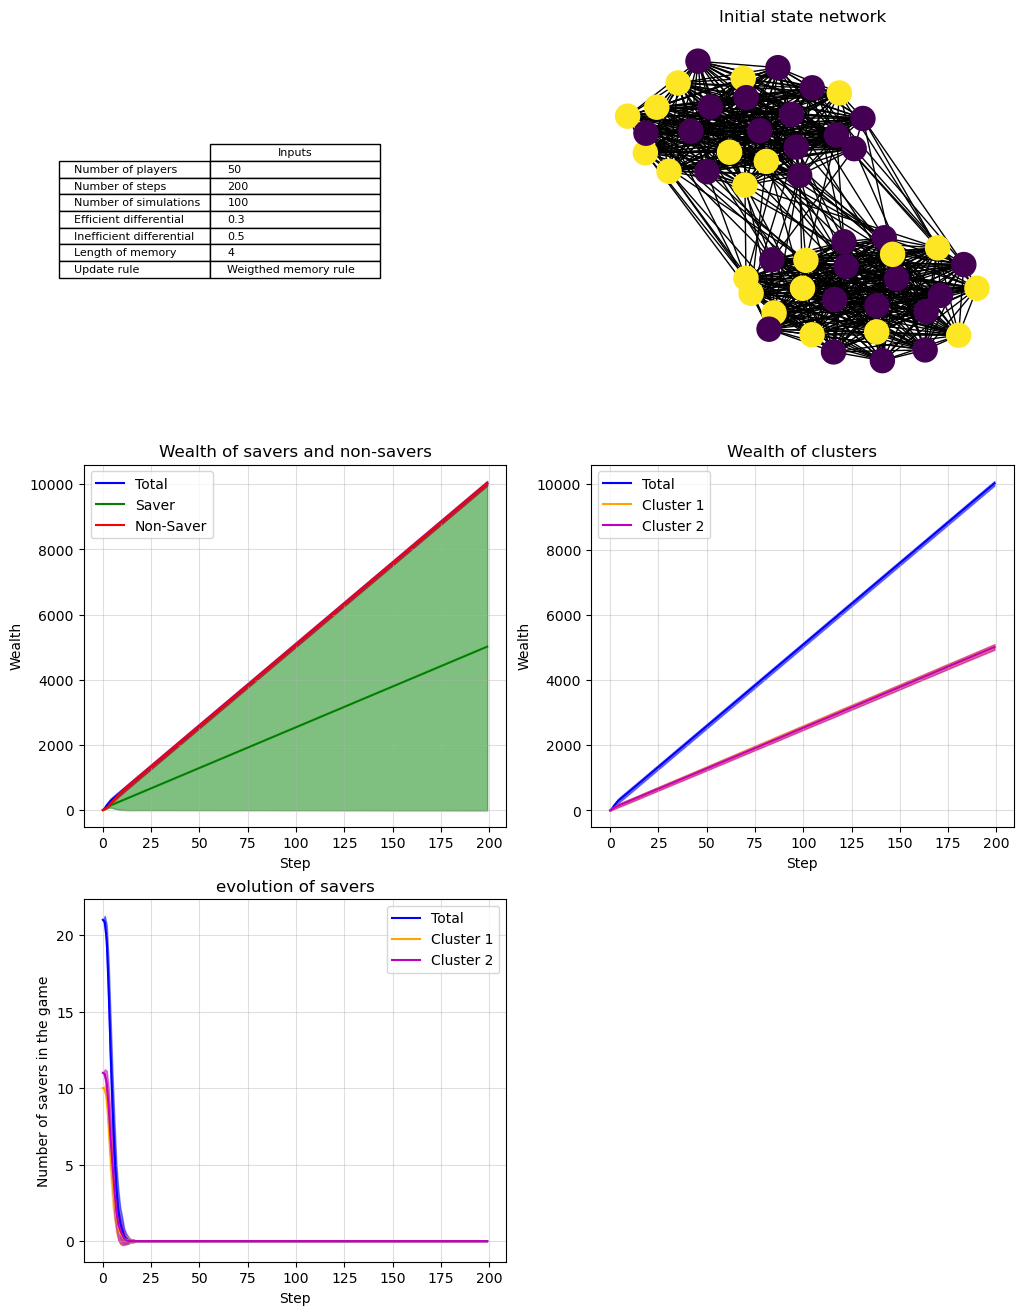

In [13]:
# Number of games that players save in their memory
memory_length = 4
# Memory rule
weights = [3, 2, 1, 0]
fraction = 0.5
update_rule = kala.models.memory_rules.WeightedMemoryRule(weights=weights,
                                                          fraction=fraction)

# If SBM
montecarlo_game_sbm(
# If another network, comment above and uncomment below
#montecarlo_game_network(g
    num_steps,
    num_simulations,
    num_players,
    threshold,
    differential_efficient,
    differential_inefficient,
    standard_deviation,
    memory_length,
    update_rule
    )